## 3. 2차원 데이터 정리
### - 두 데이터 사이의 관계를 나타내는 지표
### - 2차원 데이터의 시각화
### - 앤스컴의 예

In [1]:
'''
수학 점수가 높은 학생은 영어 점수도 높을까?
'''
import numpy as np
import pandas as pd
%precision 3
pd.set_option('precision', 3)

In [2]:
df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [3]:
# 처음 10명의 데이터만 활용
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores,
                         'mathematics': ma_scores},
                         index = pd.Index(['A','B','C','D','E',
                                          'F','G','H','I','J'],
                                         name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


#### 1. 두 데이터 사이의 관계를 나타내는 지표
* 양의 상관관계, 음의 상관관계, 무상관
* 공분산
  - 산점도(scatter plot)을 통해 데이터의 분포를 알 수 있음
    + 공분산(covariance) --> 분산과 마찬가지로 '면적' 개념으로 접근 (하지만 공분산은 음의 값을 가질 수 있다는 점에서 다름)
    + 부호를 붙인 면적의 평균 = 상관의 지표 => 공분산
    + 면적이 양의 값이 되는 것은 영어 점수와 수학 점수가 모두 평균 점수보다 높거나 모두 평균 점수보다 낮은 경우이기 때문
  - 공분산이 양의 값 -> 면적이 양의 값이 되는 데이터가 多 --> 양의 상관관계
  - 공분산이 음의 값 -> 면적이 음의 값이 되는 데이터가 多 --> 음의 상관관계
  - 공분산이 0에 가까우면 -> 무상관
  - DataFrame에도 cov 기능이 있으나 ddof 인수를 취하지 않고 불편분산만 계산 가능
* 상관계수
  - 단위에 의존하지 않는 상관을 나타내는 지표가 필요 
  - 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의할 수 있음 = 상관계수
  - 데이터가 양의 상관관계에 놓여 있을수록 1에 가까워짐
  - 데이터가 음의 상관관계에 놓여 있을수록 -1에 가까워짐
  - 1 또는 -1일 때는 데이터가 완전히 직선상에 놓임
  - 무상관이면 0

In [4]:
# 공분산1
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
summary_df['product of deviations'].mean() # 영어점수와 수학점수는 양의 상관관계가 있다

62.800

In [6]:
# 공분산2 -> np.cov() => 공분산행렬 or 분산공분산행렬
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

* [1,1] -> 영어, [2,2] -> 수학, [1,2],[2,1] -> 공분산

In [7]:
# (파이썬 인덱스는 0부터 시작이므로...) cov_mat의 [0,1],[1,0] -> 영어와 수학의 공분산
cov_mat[0,1], cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

+ cov_mat의 [0,0] -> 영어와 영어의 공분산
+ cov_mat의 [1,1] -> 수학과 수학의 공분산
+ 동일한 변수들의 공분산은 해당 변수의 분산과 같음

In [8]:
# 영어와 수학의 분산
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

In [9]:
# 상관계수1
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [10]:
# 상관계수2 -> np.corrcoef() => 상관행렬
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [11]:
# 상관계수3 -> DataFrame.corr()
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


#### 2. 2차원 데이터의 시각화
* 산점도, 회귀직선, 히트맵
* 회귀직선(Regression Line)
  - 두 데이터 사이의 관계를 더욱 잘 나타냄
  - matplotlib에는 직접 그리는 메서드 X -> numpy 활용
* 히트맵
  - 히스토그램의 2차원 버전으로 색을 이용해 표현

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

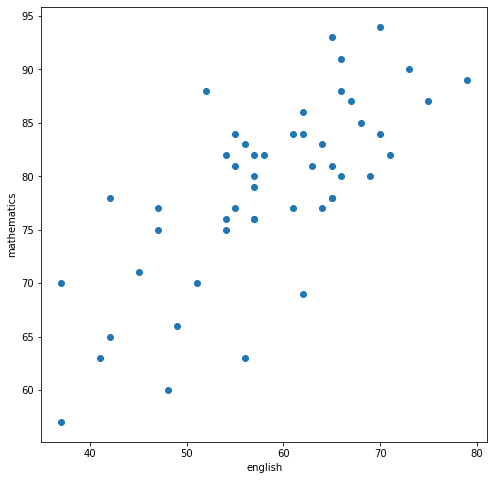

In [13]:
# 산점도
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

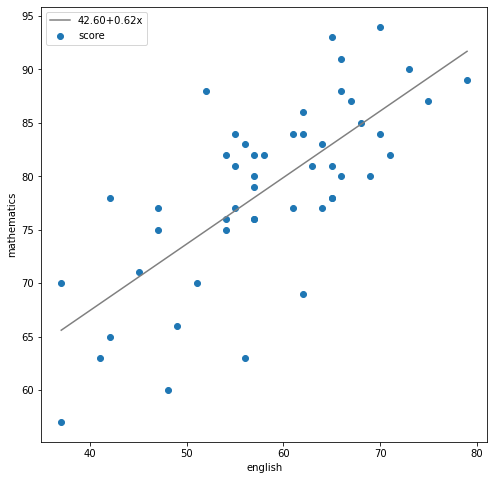

In [14]:
# 회귀직선
# 계수 β_0, β_1을 구하고
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0 + β_1 x를 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌표 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')

plt.show()

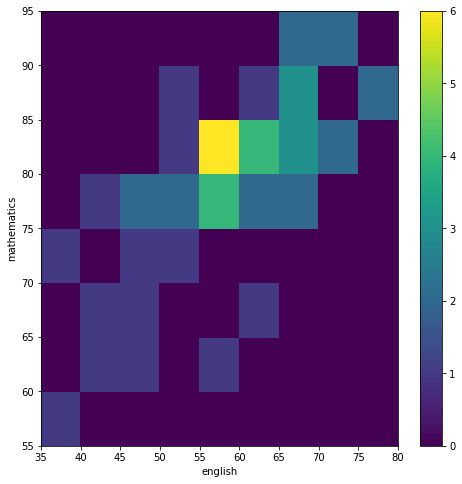

In [15]:
# 히트맵
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)

plt.show()

#### 3. 앤스컴의 예
* 수치로 데이터를 정리하면 많은 정보를 잃어버릴 수 있음 -> 동일해 보이는 지표를 가진 데이터라도 그림으로 나타내면 종종 전혀 다른 데이터가 되곤 함
* 앤스컴 콰르텟 (Anscombe's quartet)
  - 평균, 표본분산, 사오간, 선형회귀선, 결정계수 등의 기술통계량은 동일하지만, 분포나 그래프를 이용하여 시각화하면 전혀 다른 4개의 데이터 세트
  - 데이터 분석 전 시각화의 중요성을 시사

In [16]:
# npy형식으로 저장된 Numpy array를 읽어들임
anscombe_data = np.load("ch3_anscombe.npy")
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [17]:
# 각 데이터의 평균, 분산, 상관계수, 회귀직선을 계산하여 데이터프레임으로 정리
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance',
                              'X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] =\
      [f'{np.mean(dataX):.2f}',
      f'{np.var(dataX):.2f}',
      f'{np.mean(dataY):.2f}',
      f'{np.var(dataY):.2f}',
      f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
      f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


* 지표상 네 가지 데이터는 모두 동일
* 하지만 산점도로 나타내보면...

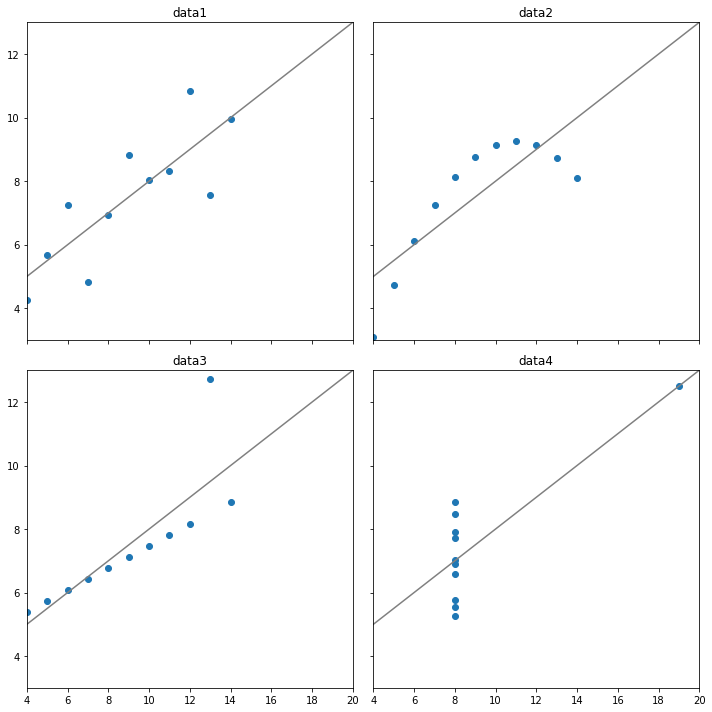

In [18]:
# 2x2영역을 가진 그래프 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)

xs = np.linspace(0,30,100)
for i,data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    # 타이틀 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')

# 그래프 사이의 간격을 좁힌다
plt.tight_layout()
plt.show()

* 전혀 다른 분포를 띠고 있음